# 5. Sampling and Sampling Distributions

This notebook covers the crucial link between sample data and population parameters. We'll explore different methods for drawing samples from a population and dive into the **Central Limit Theorem**, one of the most important theorems in statistics, which describes the shape of the distribution of sample means.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## 5.1 Types of Sampling

How you select your sample is critical to the validity of your inferences.

- **Simple Random Sampling:** Every member of the population has an equal chance of being selected.
- **Stratified Sampling:** The population is divided into subgroups (strata) based on a shared characteristic (e.g., age, gender). A random sample is then taken from each stratum. This ensures representation from all key groups.
- **Cluster Sampling:** The population is divided into clusters (e.g., geographic areas). A random sample of clusters is chosen, and *all* members within the selected clusters are sampled.
- **Systematic Sampling:** A random starting point is selected, and then every k-th member of the population is chosen.

## 5.2 Central Limit Theorem (CLT)

The **Central Limit Theorem** states that if you have a population with any shape of distribution, the distribution of the **sample means** will approach a normal distribution as the sample size increases. This is true regardless of the original population's distribution shape.

This theorem is incredibly powerful because it allows us to use normal distribution statistics to make inferences about population parameters even if we don't know the population's distribution.

### Visual Demonstration of the CLT

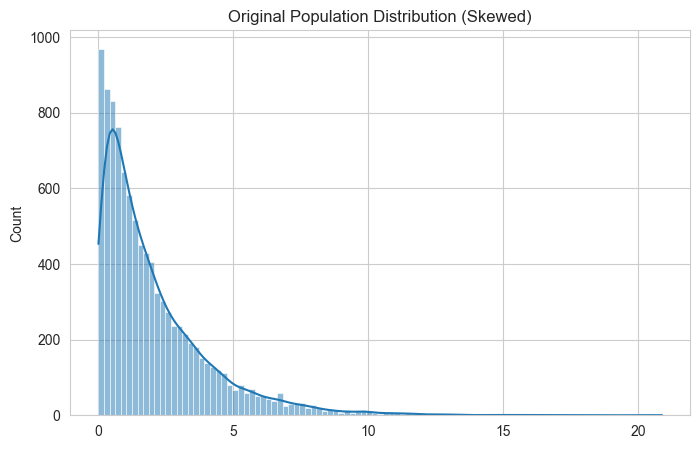

In [2]:
# Let's create a highly skewed population (e.g., an exponential distribution)
population = np.random.exponential(scale=2, size=10000)

plt.figure(figsize=(8, 5))
sns.histplot(population, kde=True)
plt.title('Original Population Distribution (Skewed)')
plt.show()

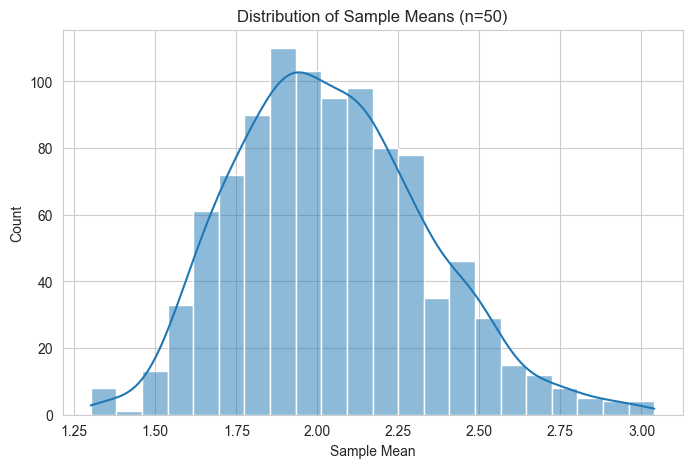

Notice how the distribution of sample means looks like a normal distribution, even though the original population was highly skewed!


In [3]:
# Now, let's take many samples, calculate their means, and plot the distribution of those means.
sample_size = 50
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(8, 5))
sns.histplot(sample_means, kde=True)
plt.title(f'Distribution of Sample Means (n={sample_size})')
plt.xlabel('Sample Mean')
plt.show()

print("Notice how the distribution of sample means looks like a normal distribution, even though the original population was highly skewed!")

## 5.3 Law of Large Numbers

The **Law of Large Numbers** is a related theorem that states that as the size of a sample drawn from a population increases, the mean of the sample gets closer to the mean of the population.

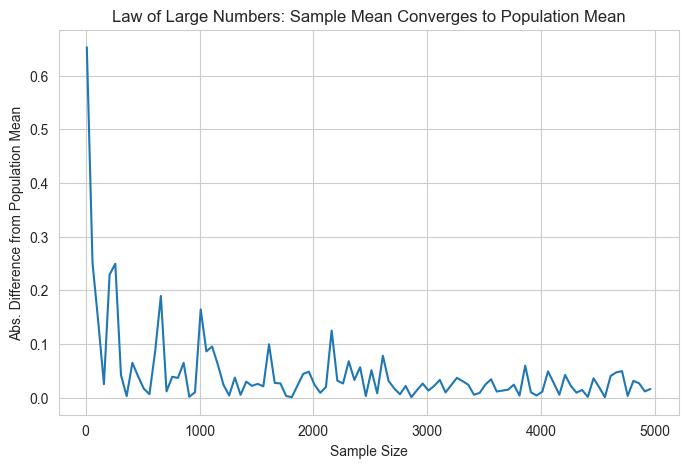

In [4]:
population_mean = np.mean(population)
sample_sizes = np.arange(10, 5000, 50)
mean_diffs = []

for size in sample_sizes:
    sample = np.random.choice(population, size=size)
    mean_diffs.append(np.abs(np.mean(sample) - population_mean))

plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, mean_diffs)
plt.title('Law of Large Numbers: Sample Mean Converges to Population Mean')
plt.xlabel('Sample Size')
plt.ylabel('Abs. Difference from Population Mean')
plt.show()

## 5.4 Sampling Distribution of the Mean

The distribution of the sample means (which we plotted for the CLT) has two important properties:
1.  The mean of the sampling distribution is equal to the population mean `μ`.
2.  The standard deviation of the sampling distribution is equal to `σ / sqrt(n)`, where `σ` is the population standard deviation and `n` is the sample size.

## 5.5 Standard Error

The standard deviation of the sampling distribution is called the **Standard Error (SE)**.
$$ SE = \frac{\sigma}{\sqrt{n}} $$ 
Since we often don't know the population standard deviation `σ`, we estimate it with the sample standard deviation `s`:
$$ SE \approx \frac{s}{\sqrt{n}} $$ 
The standard error tells us how much the sample mean is likely to vary from the population mean. A smaller SE means our sample statistic is a more accurate estimate of the population parameter.

In [5]:
sample = np.random.choice(population, size=100)
sample_std = np.std(sample, ddof=1) # Use ddof=1 for sample standard deviation
n = len(sample)

standard_error = sample_std / np.sqrt(n)

print(f"Sample standard deviation (s): {sample_std:.2f}")
print(f"Standard Error (SE): {standard_error:.2f}")

Sample standard deviation (s): 1.70
Standard Error (SE): 0.17
